In [10]:
import json

# Open the JSON file
with open("modified_json_file.json", "r") as f:
    data = json.load(f)

# Denormalization parameters
A_min = -4104.07
scale = 998.77  # A_max - A_min

# Process the data
processed_data = {
    "success": data["success"],
    "station": [
        {
            "Day": entry["Day"],
            "Shift_U": A_min + (float(entry["Shift_U"]) * scale)
        }
        for entry in data["station"]
    ]
}

# Output to JSON
output_json = json.dumps(processed_data, indent=4)
print(output_json)
with open("denormalized_shift_u.json", "w") as f:
    f.write(output_json)

{
    "success": true,
    "station": [
        {
            "Day": "2006-01-02",
            "Shift_U": 84.12217950000013
        },
        {
            "Day": "2006-01-03",
            "Shift_U": 83.25324960000034
        },
        {
            "Day": "2006-01-05",
            "Shift_U": 83.22328650000054
        },
        {
            "Day": "2006-01-06",
            "Shift_U": 86.3394489000002
        },
        {
            "Day": "2006-01-07",
            "Shift_U": 85.93994090000069
        },
        {
            "Day": "2006-01-08",
            "Shift_U": 85.8300761999999
        },
        {
            "Day": "2006-01-09",
            "Shift_U": 87.86756700000024
        },
        {
            "Day": "2006-01-10",
            "Shift_U": 86.31947349999973
        },
        {
            "Day": "2006-01-11",
            "Shift_U": 89.41566049999983
        },
        {
            "Day": "2006-01-12",
            "Shift_U": 87.49802209999962
        },
        {
  

In [11]:
import json
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

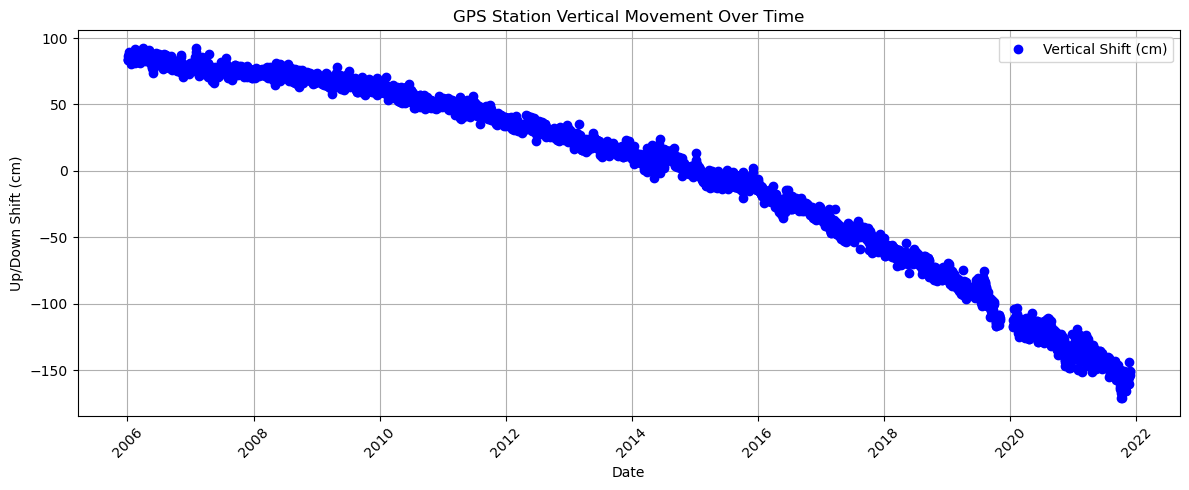

In [12]:
import json
import matplotlib.pyplot as plt
from datetime import datetime

# Read the denormalized JSON file
with open("denormalized_shift_u.json", "r") as f:
    data = json.load(f)

# Extract dates and Shift_U values
dates = []
shift_u_values = []

for entry in data["station"]:
    # Convert "Day" string to datetime object for plotting
    date = datetime.strptime(entry["Day"], "%Y-%m-%d")
    dates.append(date)
    shift_u_values.append(entry["Shift_U"])

# Create the plot
plt.figure(figsize=(12, 5))  # Set figure size
plt.plot(dates, shift_u_values, marker='o', linestyle='', color='b', label='Vertical Shift (cm)')

# Customize the plot
plt.xlabel("Date")
plt.ylabel("Up/Down Shift (cm)")
plt.title("GPS Station Vertical Movement Over Time")
plt.grid(True)
plt.legend()

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

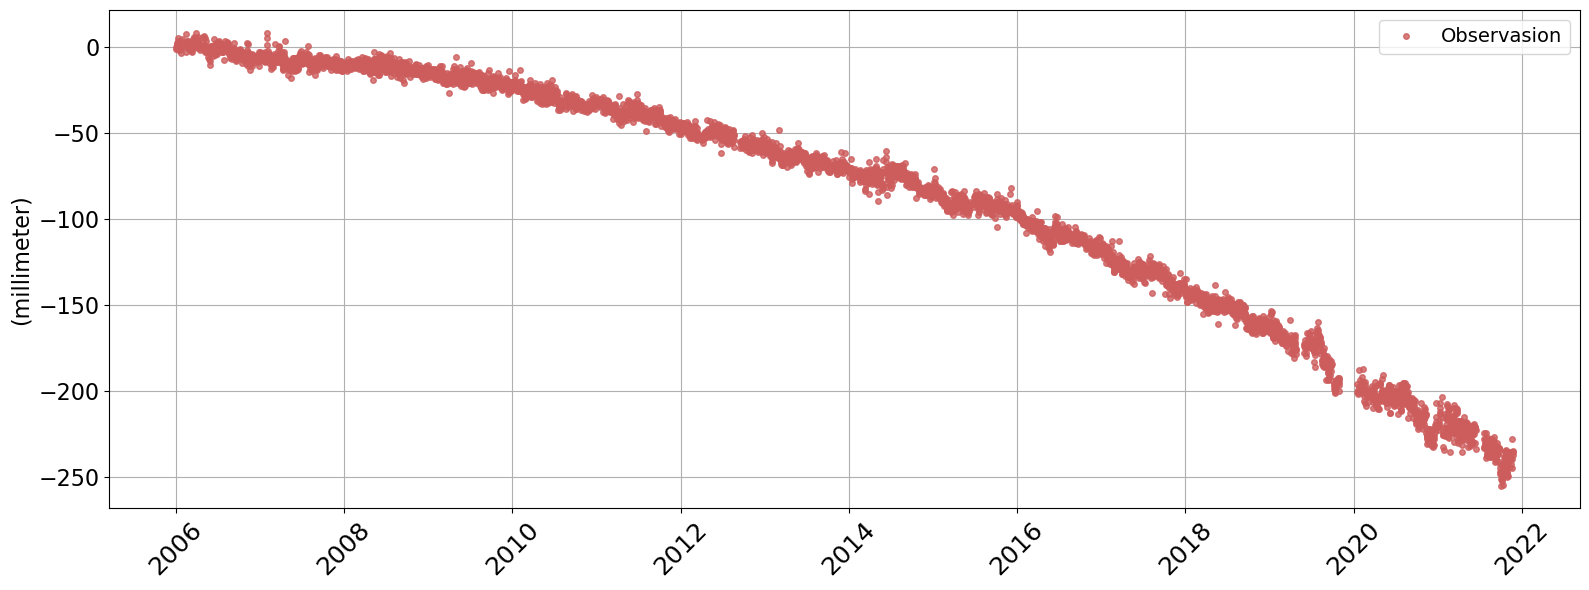

In [36]:
import json
import matplotlib.pyplot as plt
from datetime import datetime

# Read the denormalized JSON file
with open("denormalized_shift_u.json", "r") as f:
    data = json.load(f)

# Get the reference Shift_U from the first day
reference_shift_u = data["station"][0]["Shift_U"]

# Adjust all Shift_U values relative to the first day
relative_data = {
    "success": data["success"],
    "station": [
        {
            "Day": entry["Day"],
            "Shift_U": entry["Shift_U"] - reference_shift_u
        }
        for entry in data["station"]
    ]
}

# Extract dates and adjusted Shift_U values for plotting
dates = []
shift_u_values = []

for entry in relative_data["station"]:
    date = datetime.strptime(entry["Day"], "%Y-%m-%d")
    dates.append(date)
    shift_u_values.append(entry["Shift_U"])

# Create the plot
plt.figure(figsize=(16, 6))
plt.plot(dates, shift_u_values, marker='o', linestyle='', color='indianred', alpha=0.8, markersize=4, label='Observasion')

# Customize the plot
plt.xticks( fontsize=18)
plt.yticks( fontsize=16)
plt.ylabel("(millimeter)", fontsize= 16)
#plt.title("Golmakan GNSS Station Vertical Movement", fontweight = 'bold')
plt.grid(True)
plt.legend(fontsize= 14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('golmakan_gps.png')
# Show the plot
plt.show()

# Optionally, save the adjusted data
with open("relative_denormalized_shift_u.json", "w") as f:
    json.dump(relative_data, f, indent=4)